# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from typing import Callable

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


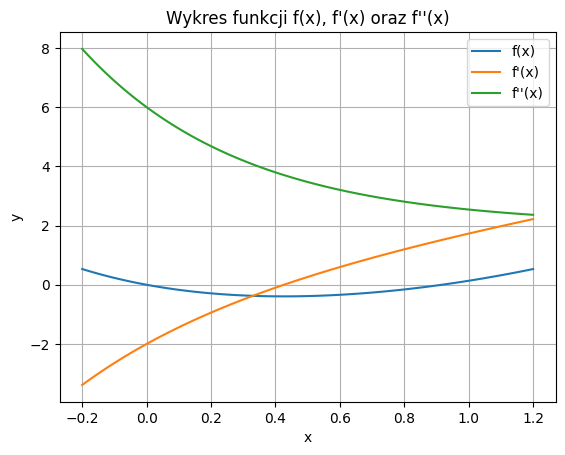

In [2]:
# ===== Twoja implementacja tutaj =====
def func(x: int | float | np.ndarray) -> int | float | np.ndarray:
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )
    return np.exp(-2 * x) + x**2 - 1
def dfunc(x: np.ndarray) -> np.ndarray:
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )
    return -2 * np.exp(-2 * x) + 2 * x
def ddfunc(x: np.ndarray) -> np.ndarray:
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )
    return 4 * np.exp(-2 * x) + 2

x = np.linspace(-0.2, 1.2, 100)
y = func(x)
dy = dfunc(x)
ddy = ddfunc(x)
plt.plot(x, y, label="f(x)")
plt.plot(x, dy, label="f'(x)")
plt.plot(x, ddy, label="f''(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres funkcji f(x), f'(x) oraz f''(x)")
plt.grid()
plt.show()

ad. 2. Miejsca zerowe znajdują się w okolicy 0 i 0.9.

ad. 3. Pochodne są wykorzystywane w metodzie Newtona, czyli jednym z algorytmów poszukiwania miejsc zerowych.

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [3]:
def bisection(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:
    if isinstance(a, (int, float)) and isinstance(b, (int, float)) and a < b:
        fa = f(a)
        fb = f(b)

        if fa * fb > 0:
            return None

        for i in range(1, max_iter + 1):
            c = (a + b) / 2
            fc = f(c)

            if abs(fc) < epsilon or (b - a) / 2 < epsilon:
                return c, i

            if fa * fc < 0:
                b = c
                fb = fc
            else:
                a = c
                fa = fc
    return None

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [4]:
def secant(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iters: int,
) -> tuple[float, int] | None:
    """funkcja aproksymująca rozwiązanie równania f(x) = 0 na przedziale [a,b] 
    metodą siecznych.

    Args:
        a (int | float): Początek przedziału.
        b (int | float): Koniec przedziału.
        f (Callable[[float], float]): Funkcja, dla której poszukiwane jest 
            rozwiązanie.
        epsilon (float): Tolerancja zera maszynowego (warunek stopu).
        max_iters (int): Maksymalna liczba iteracji.

    Returns:
        (tuple[float, int]):
            - Aproksymowane rozwiązanie,
            - Liczba wykonanych iteracji.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if isinstance(a, (int, float)) and isinstance(b, (int, float)) and isinstance(epsilon, float) and epsilon > 0 and isinstance(max_iters, int) and max_iters > 0 and callable(f) and a != b:
        x0 = float(a)
        x1 = float(b)
        f0 = f(x0)
        f1 = f(x1)
        if abs(f0) <= epsilon: return x0, 0
        if abs(f1) <= epsilon: return x1, 0
        for i in range(1, max_iters+1):
            d = f1 - f0
            if abs(d) < 1e-15:
                return None

            x2 = x1 - f1 * (x1 - x0) / (d)
            f2 = f(x2)
            if abs(f2) < epsilon:
                return x2, i
            if f0 * f2 < 0:
                x1, f1 = x2, f2
            else:
                x0, f0 = x2, f2
        return x1, max_iters
    return None


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [5]:
def difference_quotient(
    f: Callable[[float], float], x: int | float, h: int | float
) -> float | None:
    """Funkcja obliczająca wartość iloazu różnicowego w punkcie x dla zadanej 
    funkcji f(x).

    Args:
        f (Callable[[float], float]): Funkcja, dla której poszukiwane jest 
            rozwiązanie.
        x (int | float): Argument funkcji.
        h (int | float): Krok różnicy wykorzystywanej do wyliczenia ilorazu 
            różnicowego.

    Returns:
        (float): Wartość ilorazu różnicowego.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if isinstance(f, Callable) and isinstance(x, (int, float)) and isinstance(h, (int, float)) and h != 0:
        return (f(x + h) - f(x)) / h
    return None 


def newton(
    f: Callable[[float], float],
    df: Callable[[float], float],
    ddf: Callable[[float], float],
    a: int | float,
    b: int | float,
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:
    """Funkcja aproksymująca rozwiązanie równania f(x) = 0 metodą Newtona.

    Args:
        f (Callable[[float], float]): Funkcja, dla której poszukiwane jest 
            rozwiązanie.
        df (Callable[[float], float]): Pierwsza pochodna funkcji, dla której 
            poszukiwane jest rozwiązanie.
        ddf (Callable[[float], float]): Druga pochodna funkcji, dla której 
            poszukiwane jest rozwiązanie.
        a (int | float): Początek przedziału.
        b (int | float): Koniec przedziału.
        epsilon (float): Tolerancja zera maszynowego (warunek stopu).
        max_iter (int): Maksymalna liczba iteracji.

    Returns:
        (tuple[float, int]):
            - Aproksymowane rozwiązanie,
            - Liczba wykonanych iteracji.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if isinstance(a, (int, float)) and isinstance(b, (int, float)) and isinstance(epsilon, float) and epsilon > 0 and isinstance(max_iter, int) and max_iter > 0:
        if f(b) * ddf(b) > 0:
            x0 = b
        else:
            x0 = a
        for i in range(1, max_iter + 1):
            dfx0 = df(x0)
            if abs(dfx0) < 1e-15:
                return None
            x1 = x0 - f(x0) / dfx0
            if abs(f(x1)) < epsilon:
                return x1, i
            x0 = x1
        return x0, max_iter
    return None

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [16]:
# ===== Twoja implementacja tutaj =====
x01 = -0.5
x02 = 1.0
roots1 = sp.optimize.root(func, x01)
print("Pierwiastki funkcji znalezione za pomocą scipy.optimize.root:", roots1.x)
fsroots1 = sp.optimize.fsolve(func, x01)
print("Pierwiastki funkcji znalezione za pomocą scipy.optimize.fsolve:", fsroots1)
roots2 = sp.optimize.root(func, x02)
print("Pierwiastki funkcji znalezione za pomocą scipy.optimize.root:", roots2.x)
fsroots2 = sp.optimize.fsolve(func, x02)
print("Pierwiastki funkcji znalezione za pomocą scipy.optimize.fsolve:", fsroots2)

Pierwiastki funkcji znalezione za pomocą scipy.optimize.root: [1.42106155e-17]
Pierwiastki funkcji znalezione za pomocą scipy.optimize.fsolve: [1.42106155e-17]
Pierwiastki funkcji znalezione za pomocą scipy.optimize.root: [0.91656258]
Pierwiastki funkcji znalezione za pomocą scipy.optimize.fsolve: [0.91656258]


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Pierwiastki funkcji znalezione za pomocą scipy.optimize.root: [1.42106155e-17] [0.91656258]
Pierwiastki funkcji znalezione za pomocą scipy.optimize.fsolve: [1.42106155e-17] [0.91656258]

Metoda bisekcji: 
Pierwiastek = -6.938893903907228e-18 , Liczba iteracji = 3 ; 
Pierwiastek = 0.9165625830646604 , Liczba iteracji = 31
Błąd metody bisekcji względem scipy.optimize.root to odpowiednio: 2.1149509380688382e-17 4.1038283882244286e-11

Metoda siecznych: 
Pierwiastek = 2.98943416502829e-11 , Liczba iteracji = 33 ; 
Pierwiastek = 0.9165625830854545 , Liczba iteracji = 9
Błąd metody siecznych względem scipy.optimize.root to odpowiednio: 2.9894327439667424e-11 2.0244250720224954e-11

Metoda Newtona: 
Pierwiastek = -5.125559246038141e-17 , Liczba iteracji = 6 ; 
Pierwiastek = 0.9165625831056982 , Liczba iteracji = 4
Błąd metody Newtona względem scipy.optimize.root to odpowiednio: 6.546620793716255e-17 5.551115123125783e-16


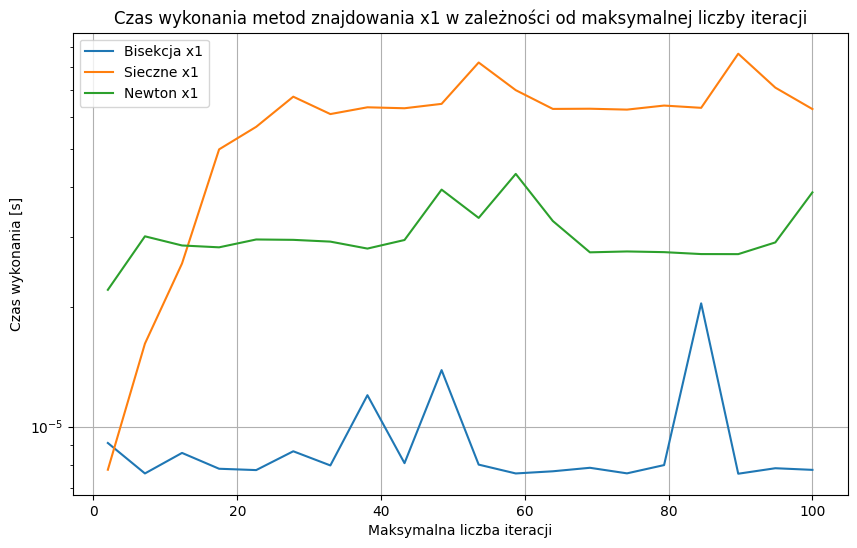

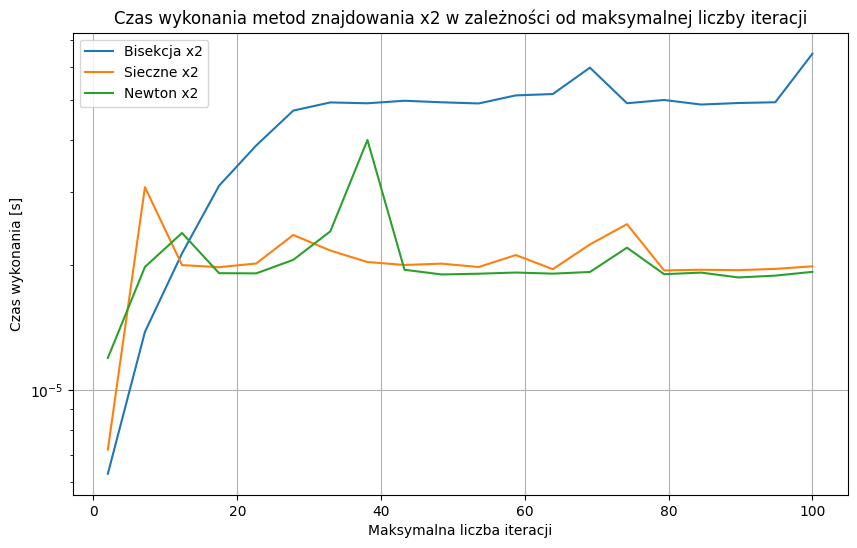

In [29]:
# ===== Twoja implementacja tutaj =====
tol = 1e-10
x01 = [-0.5, 0.3]
x02 = [0.5, 1.0]
it = 100
bis1 = bisection(x01[0], x01[1], func, tol, it)
sec1 = secant(x01[0], x01[1], func, tol, it)
newt1 = newton(func, dfunc, ddfunc, x01[0], x01[1], tol, it)
bis2 = bisection(x02[0], x02[1], func, tol, it)
sec2 = secant(x02[0], x02[1], func, tol, it)
newt2 = newton(func, dfunc, ddfunc, x02[0], x02[1], tol, it)

print("Pierwiastki funkcji znalezione za pomocą scipy.optimize.root:", roots1.x, roots2.x)
print("Pierwiastki funkcji znalezione za pomocą scipy.optimize.fsolve:", fsroots1, fsroots2)
print("\nMetoda bisekcji: \nPierwiastek =", bis1[0], ", Liczba iteracji =", bis1[1], "; \nPierwiastek =", bis2[0], ", Liczba iteracji =", bis2[1])
print("Błąd metody bisekcji względem scipy.optimize.root to odpowiednio:", abs(bis1[0] - roots1.x[0]), abs(bis2[0] - roots2.x[0]))
print("\nMetoda siecznych: \nPierwiastek =", sec1[0], ", Liczba iteracji =", sec1[1], "; \nPierwiastek =", sec2[0], ", Liczba iteracji =", sec2[1])
print("Błąd metody siecznych względem scipy.optimize.root to odpowiednio:", abs(sec1[0] - roots1.x[0]), abs(sec2[0] - roots2.x[0]))
print("\nMetoda Newtona: \nPierwiastek =", newt1[0], ", Liczba iteracji =", newt1[1], "; \nPierwiastek =", newt2[0], ", Liczba iteracji =", newt2[1])
print("Błąd metody Newtona względem scipy.optimize.root to odpowiednio:", abs(newt1[0] - roots1.x[0]), abs(newt2[0] - roots2.x[0]))

iteration_values = np.linspace(2,100,20)
time_bisection_x1 = []
time_secant_x1 = []
time_newton_x1 = []
time_bisection_x2 = []
time_secant_x2 = []
time_newton_x2 = []
for i in iteration_values:
    time = %timeit -r 5 -n 10 -q -o bisection(x01[0], x01[1], func, tol, int(i))
    time_bisection_x1.append(time.average)
    time = %timeit -r 5 -n 10 -q -o secant(x01[0], x01[1], func, tol, int(i))
    time_secant_x1.append(time.average)
    time = %timeit -r 5 -n 10 -q -o newton(func, dfunc, ddfunc, x01[0], x01[1], tol, int(i))
    time_newton_x1.append(time.average)
    time = %timeit -r 5 -n 10 -q -o bisection(x02[0], x02[1], func, tol, int(i))
    time_bisection_x2.append(time.average)
    time = %timeit -r 5 -n 10 -q -o secant(x02[0], x02[1], func, tol, int(i))
    time_secant_x2.append(time.average)
    time = %timeit -r 5 -n 10 -q -o newton(func, dfunc, ddfunc, x02[0], x02[1], tol, int(i))
    time_newton_x2.append(time.average)
plt.figure(figsize=(10, 6))
plt.plot(iteration_values, time_bisection_x1, label="Bisekcja x1")
plt.plot(iteration_values, time_secant_x1, label="Sieczne x1")
plt.plot(iteration_values, time_newton_x1, label="Newton x1")
plt.yscale("log")
plt.xlabel("Maksymalna liczba iteracji")
plt.ylabel("Czas wykonania [s]")
plt.title("Czas wykonania metod znajdowania x1 w zależności od maksymalnej liczby iteracji")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(iteration_values, time_bisection_x2, label="Bisekcja x2")
plt.plot(iteration_values, time_secant_x2, label="Sieczne x2")
plt.plot(iteration_values, time_newton_x2, label="Newton x2")
plt.yscale("log")
plt.xlabel("Maksymalna liczba iteracji")
plt.ylabel("Czas wykonania [s]")
plt.title("Czas wykonania metod znajdowania x2 w zależności od maksymalnej liczby iteracji")
plt.legend()
plt.grid()
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)